In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite3 import connect

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
dataset9= pd.read_sql('''
select uid as user, timestamp,date(timestamp) date
from checker
where uid like '%user%' and status = 'ready' 
and labname='project1'
''', con,parse_dates=['timestamp'])
dataset9

,user,timestamp,date
0,user_4,2020-04-17 05:19:02.744528,2020-04-17
1,user_4,2020-04-17 05:22:45.549397,2020-04-17
2,user_4,2020-04-17 05:34:24.422370,2020-04-17
3,user_4,2020-04-17 05:43:27.773992,2020-04-17
4,user_4,2020-04-17 05:46:32.275104,2020-04-17
...,...,...,...
946,user_19,2020-05-15 10:22:39.698523,2020-05-15
947,user_19,2020-05-15 10:22:46.248162,2020-05-15
948,user_19,2020-05-15 10:23:18.043212,2020-05-15
949,user_28,2020-05-15 10:38:14.430013,2020-05-15


In [5]:
df_9 = dataset9.copy()
df_9.drop(columns='timestamp', axis=1, inplace=True)
df_9

,user,date
0,user_4,2020-04-17
1,user_4,2020-04-17
2,user_4,2020-04-17
3,user_4,2020-04-17
4,user_4,2020-04-17
...,...,...
946,user_19,2020-05-15
947,user_19,2020-05-15
948,user_19,2020-05-15
949,user_28,2020-05-15


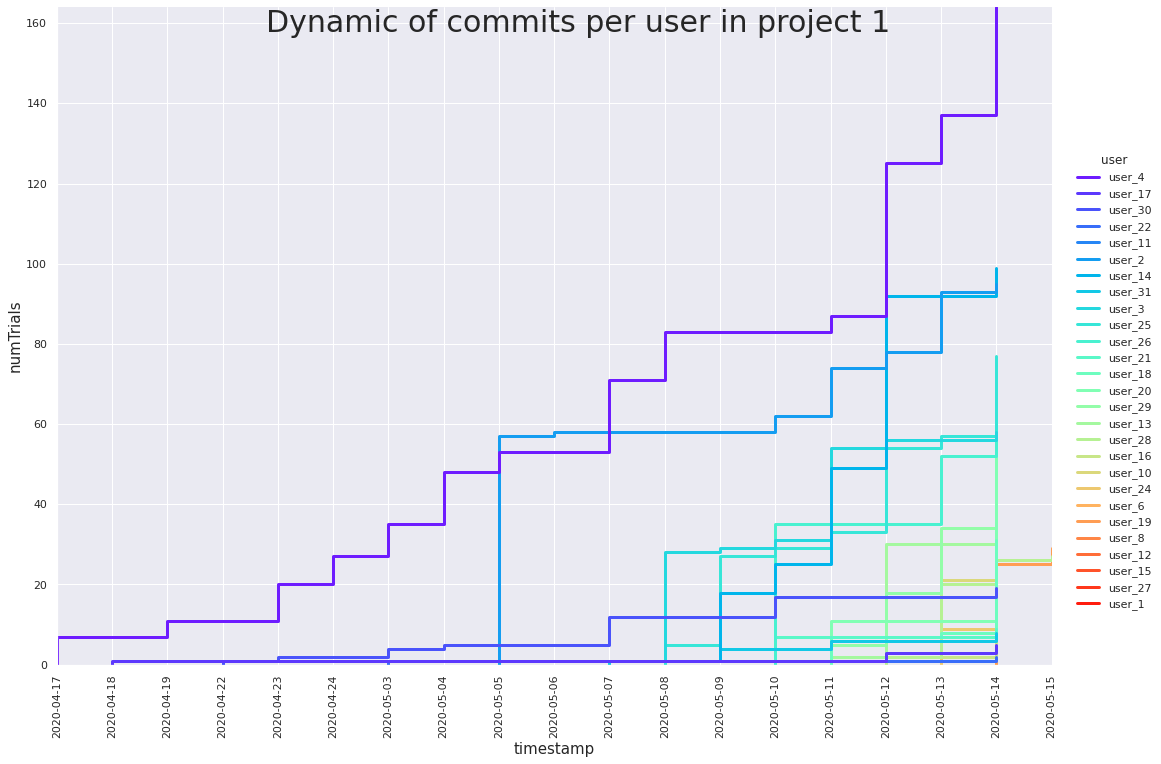

In [6]:

sns.set_theme()
sns.set_style('darkgrid')
ax=sns.displot(x='date', hue='user', stat="count", kind="ecdf", data=df_9, aspect=1.5, height=10, palette='rainbow', linewidth = 3)

ax.ax.set_ylabel('numTrials', fontsize=15)
ax.ax.set_xlabel('timestamp', fontsize=15)
plt.suptitle('Dynamic of commits per user in project 1', size=30)
ax.ax.set_xlim(xmin = (df_9['date'].min()), xmax = (df_9['date'].max()))
plt.rcParams["axes.labelsize"] = 15
plt.xticks(rotation=90)
plt.show()

In [7]:
#@markdown **Какой пользователь имел самое большое количество коммитов на протяжении почти всего времени?  Ответ: user_4**

#@markdown **Какой пользователь был лидером по количеству коммитов, но в течение очень ограниченного периода времени? Ответ: user_2**

In [8]:
con.close()